# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

# Import Dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID is irrelevant, so we'll exclude the column.

In [4]:
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Find Optimal Numer of Clusters (k) using Elbow Method

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(i, init='k-means++', random_state=42)
    kmeans.fit(X)    
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

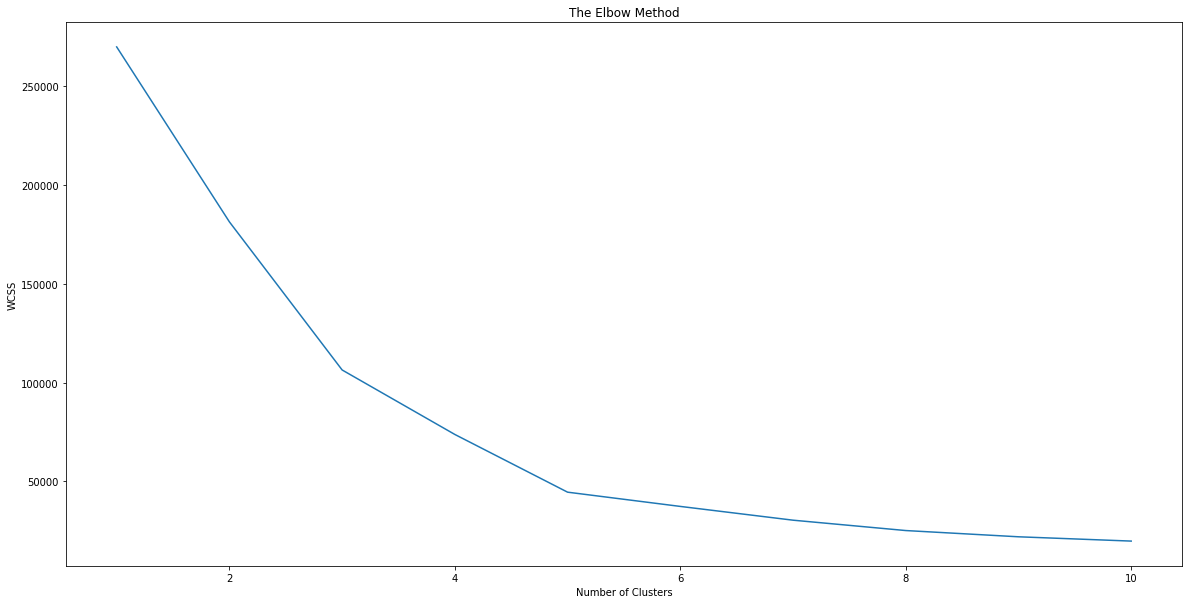

In [7]:
plt.figure(figsize=(20, 10));
plt.plot(range(1,11), wcss);
plt.title('The Elbow Method');
plt.xlabel('Number of Clusters');
plt.ylabel('WCSS');
plt.show()

From the graph, it can be seen that k=5 is optimal.<br>
Therefore, there are 5 clusters namely 1, 2, 3, 4, 5.<br>
That is, there are 5 groups of customers in the mall.<br>

# Training K-Means

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', verbose=1)
y = kmeans.fit_predict(X)

Initialization complete
Iteration 0, inertia 65910.0
Iteration 1, inertia 45120.13628019223
Iteration 2, inertia 44448.45544793369
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 61257.0
Iteration 1, inertia 45035.42738426894
Iteration 2, inertia 44586.43912798357
Iteration 3, inertia 44448.45544793369
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 52190.0
Iteration 1, inertia 45277.541598720025
Iteration 2, inertia 44509.946167595655
Iteration 3, inertia 44448.45544793369
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 73908.0
Iteration 1, inertia 48472.31774589071
Iteration 2, inertia 44605.750487144025
Iteration 3, inertia 44478.40075665766
Iteration 4, inertia 44454.47647967972
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 78976.0
Iteration 1, inertia 69046.41641333532
Iteration 2, inertia 66929.06315093923
It

In [9]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [10]:
dataset['Categories'] = pd.DataFrame(y)

In [11]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Categories
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


# Visualizing the Clusters

In [12]:
dataset[dataset['Categories'] == 0]['Spending Score (1-100)']

43     61
46     55
47     47
48     42
49     42
       ..
121    40
122    58
126    35
132    34
142    40
Name: Spending Score (1-100), Length: 81, dtype: int64

In [13]:
#empty dictionaries
clusters_centroids=dict()
clusters_radii= dict()

#looping over clusters and calculate Euclidian distance of 
#each point within that cluster from its centroid and 
#pick the maximum which is the radius of that cluster

for cluster in list(set(y)):
    clusters_centroids[cluster]=list(zip(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i,clusters_centroids[cluster])) for i in zip(X[y == cluster, 0],X[y == cluster, 1])])

<Figure size 1080x720 with 0 Axes>

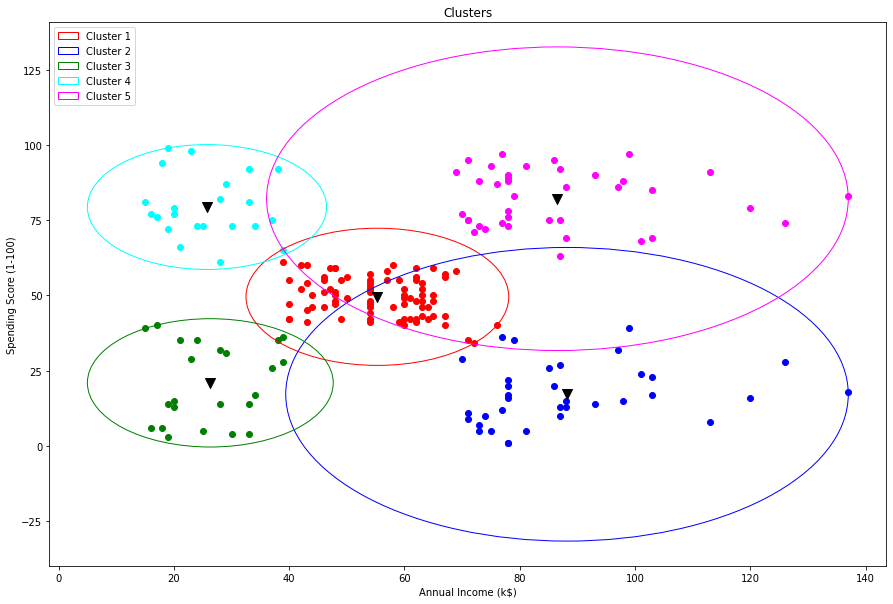

In [14]:
plt.figure(figsize=(15, 10));
fig, ax = plt.subplots(1,figsize=(15,10));

plt.scatter(X[y ==0, 0], X[y ==0, 1],c='red', label='Cluster 1');
art = mpatches.Circle(clusters_centroids[0],clusters_radii[0], edgecolor='r',fill=False);
ax.add_patch(art);

plt.scatter(X[y ==1, 0], X[y ==1, 1],c='blue', label='Cluster 2');
art = mpatches.Circle(clusters_centroids[1],clusters_radii[1], edgecolor='b',fill=False);
ax.add_patch(art);

plt.scatter(X[y ==2, 0], X[y ==2, 1],c='green', label='Cluster 3');
art = mpatches.Circle(clusters_centroids[2],clusters_radii[2], edgecolor='g',fill=False);
ax.add_patch(art);

plt.scatter(X[y ==3, 0], X[y ==3, 1],c='cyan', label='Cluster 4');
art = mpatches.Circle(clusters_centroids[3],clusters_radii[3], edgecolor='cyan',fill=False);
ax.add_patch(art);

plt.scatter(X[y ==4, 0], X[y ==4, 1],c='magenta', label='Cluster 5');
art = mpatches.Circle(clusters_centroids[4],clusters_radii[4], edgecolor='magenta',fill=False);
ax.add_patch(art);

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='black', marker='v', s=100, label='Centroids');

plt.title('Clusters')
plt.xlabel('Annual Income (k$)');
plt.ylabel('Spending Score (1-100)');
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']);
plt.show();

# Analysis
- Cluster 3 (Green) : People with low annual income and who spends lower in the mall. These are customers still less targeted.
<br><br>
- Cluster 2 (Blue) : People with high annual income and who still doesn't spend much money in the mall. These customers can be targeted so that they can be tempted to spend more in the mall. These are the customers with 3rd priority to be targeted (1 - Cluster 5, 2 - Cluster 2).
<br><br>
- Cluster 4 (Cyan) : People with low annual income and who spend a lot in the mall. These Customers are less targeted by the mall (if the mall wishes to so that the people with low income doesn't need to spend too much in the mall - ethics).
<br><br>
- Cluster 5 (Magenta) : People with higher annual income and who spends more in the mall. These customers are likely to buy more in the mall so they are the priority targets for the mall.
<br><br>
- Cluster 1 (Red) : People with average annual income and spends averagely in the mall.